In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

#### Resources <br> https://medium.com/@RenatoFillinich/ab-testing-with-python-e5964dd66143 <br>https://www.linkedin.com/pulse/automating-random-group-assignment-hypothesis-testing-england-ph-d <br>https://github.com/renatofillinich/ab_test_guide_in_python/blob/master/AB%20testing%20with%20Python.ipynb

In [2]:
datapath=r'sellerdata_lp_req_v5.csv'

In [3]:
df=pd.read_csv(datapath)

In [4]:
df.columns

Index(['merchant_customer_id', 'has_lp_buyable_asin_count',
       'cn_based_buyable_asin_count', 'sas_managed_buyable_asin_count',
       'hardlines_buyable_asin_count', 'softlines_buyable_asin_count',
       'consumables_buyable_asin_count',
       'hardlines_oct_21_new_selection_count',
       'softlines_oct_21_new_selection_count',
       'consumables_oct_21_new_selection_count', 'oct_21_new_selection_count',
       'hardlines_sep_21_new_selection_count',
       'softlines_sep_21_new_selection_count',
       'consumables_sep_21_new_selection_count', 'sep_21_new_selection_count',
       'hardlines_aug_21_new_selection_count',
       'softlines_aug_21_new_selection_count',
       'consumables_aug_21_new_selection_count', 'aug_21_new_selection_count',
       'seller_brand_owner_selection_count'],
      dtype='object')

In [5]:
pd.options.display.max_columns=30

In [6]:
len(df['merchant_customer_id'].unique())

38679

In [7]:
#df.drop_duplicates(subset=['ASIN'], keep='last',inplace=True)

In [8]:
df.shape

(38679, 20)

In [10]:
df=pd.get_dummies(df, prefix_sep='_', drop_first=True)

In [12]:
df.columns

Index(['merchant_customer_id', 'has_lp_buyable_asin_count',
       'cn_based_buyable_asin_count', 'sas_managed_buyable_asin_count',
       'hardlines_buyable_asin_count', 'softlines_buyable_asin_count',
       'consumables_buyable_asin_count',
       'hardlines_oct_21_new_selection_count',
       'softlines_oct_21_new_selection_count',
       'consumables_oct_21_new_selection_count', 'oct_21_new_selection_count',
       'hardlines_sep_21_new_selection_count',
       'softlines_sep_21_new_selection_count',
       'consumables_sep_21_new_selection_count', 'sep_21_new_selection_count',
       'hardlines_aug_21_new_selection_count',
       'softlines_aug_21_new_selection_count',
       'consumables_aug_21_new_selection_count', 'aug_21_new_selection_count',
       'seller_brand_owner_selection_count'],
      dtype='object')

In [13]:
def ecdf(n):
    x=np.sort(n)
    y=np.linspace(1,len(n),num=len(n),endpoint=True)/len(n)
    return x, y

In [14]:
x,y=ecdf(df['has_lp_buyable_asin_count'])

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

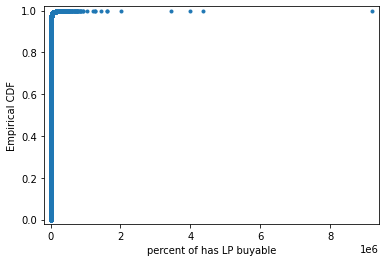

In [16]:
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('percent of has LP buyable')
_ = plt.ylabel('Empirical CDF')
plt.margins(0.02) # Keeps data off plot edges
plt.show()

In [17]:
df['total_buyable_asin_count']=df['hardlines_buyable_asin_count']+df['softlines_buyable_asin_count']+df['consumables_buyable_asin_count']

In [18]:
np.percentile(df['total_buyable_asin_count'], 
              [5,10,15,20,25,30,40,50,60,70,75,80,85,90,95,99.9]) 
# limit to sellers who have set up at least one ASIN in the past 3 months 
# limit to more active sellers

array([1.31000000e+02, 2.36000000e+02, 3.63000000e+02, 5.28000000e+02,
       7.41000000e+02, 1.01600000e+03, 1.82900000e+03, 3.31700000e+03,
       5.63200000e+03, 9.23900000e+03, 1.17740000e+04, 1.50408000e+04,
       2.02160000e+04, 2.80938000e+04, 4.71103000e+04, 1.09938116e+06])

In [19]:
df.sum()

merchant_customer_id                     -9215074959002327115
has_lp_buyable_asin_count                           176381411
cn_based_buyable_asin_count                         155150463
sas_managed_buyable_asin_count                       58964372
hardlines_buyable_asin_count                        377953655
softlines_buyable_asin_count                        196032594
consumables_buyable_asin_count                        9805320
hardlines_oct_21_new_selection_count                 27973004
softlines_oct_21_new_selection_count                 14225101
consumables_oct_21_new_selection_count                 536780
oct_21_new_selection_count                           42734885
hardlines_sep_21_new_selection_count                 42134061
softlines_sep_21_new_selection_count                 20165858
consumables_sep_21_new_selection_count                 661062
sep_21_new_selection_count                           62960981
hardlines_aug_21_new_selection_count                 41340374
softline

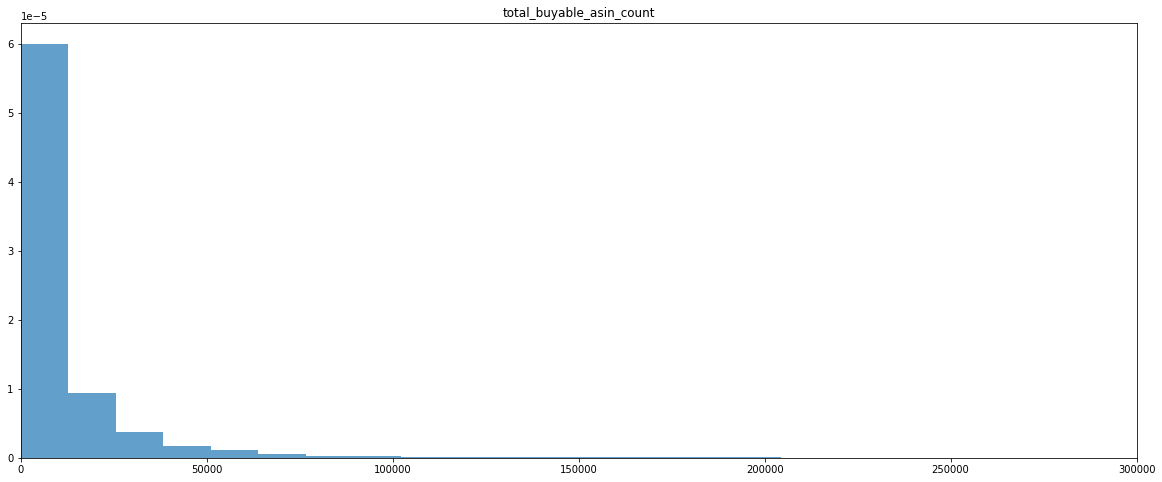

In [20]:
plt.figure(figsize=[20,8])
plt.hist(df['total_buyable_asin_count'], bins=1500, density=True,alpha=0.7)
#plt.xticks(np.linspace(-0.35,0.42,num=50).round(2),rotation=50)
plt.title ('total_buyable_asin_count')
plt.xlim(0,300000)
plt.show()

In [21]:
# limit to sellers who are not in the top 5 percentile in terms of total buyable asin count
df2=df[(df['total_buyable_asin_count']<np.percentile(df['total_buyable_asin_count'],98))]

In [22]:
df2.sum()

merchant_customer_id                     -9215120995055914435
has_lp_buyable_asin_count                            61016451
cn_based_buyable_asin_count                          58619957
sas_managed_buyable_asin_count                        5596580
hardlines_buyable_asin_count                        219045801
softlines_buyable_asin_count                        104936879
consumables_buyable_asin_count                        7071198
hardlines_oct_21_new_selection_count                 21888804
softlines_oct_21_new_selection_count                 11191059
consumables_oct_21_new_selection_count                 484993
oct_21_new_selection_count                           33564856
hardlines_sep_21_new_selection_count                 32686152
softlines_sep_21_new_selection_count                 15546984
consumables_sep_21_new_selection_count                 545512
sep_21_new_selection_count                           48778648
hardlines_aug_21_new_selection_count                 31010427
softline

In [23]:
df2.shape

(37905, 21)

In [24]:
# need 352,415 ASINs in each group to detect 10% diff

In [29]:
size_of_n=300
size_of_N=2*size_of_n

In [30]:
list_of_columns=['has_lp_buyable_asin_count',
       'cn_based_buyable_asin_count', 'sas_managed_buyable_asin_count',
       'hardlines_buyable_asin_count', 'softlines_buyable_asin_count',
       'consumables_buyable_asin_count',
       'hardlines_oct_21_new_selection_count',
       'softlines_oct_21_new_selection_count',
       'consumables_oct_21_new_selection_count',
       'hardlines_sep_21_new_selection_count',
       'softlines_sep_21_new_selection_count',
       'consumables_sep_21_new_selection_count',
       'hardlines_aug_21_new_selection_count',
       'softlines_aug_21_new_selection_count',
       'consumables_aug_21_new_selection_count',
       'seller_brand_owner_selection_count'] 

# factors that you want to balance

In [31]:
#create a list for max relative diff
min_p_value_list=[]

In [32]:
for i in range(1000):
    df2=df.sample(n=size_of_N,replace=False,random_state=i)
    treatment_group=df2.iloc[:size_of_n]
    control_group=df2.iloc[size_of_n:]
    significance_list=[]
    for column in list_of_columns:
        significance=round(mannwhitneyu(treatment_group[column],control_group[column])[1],3)
        significance_list.append(significance)
    min_p_value=min(significance_list)
    min_p_value_list.append(min_p_value)

In [33]:
maximum_p_value=max(min_p_value_list)
print(maximum_p_value)

0.239


In [34]:
index=0
for i in range(len(min_p_value_list)):
    if maximum_p_value != min_p_value_list[i]:
        index +=1
    else:
        break

In [35]:
random_state_number=index
print(random_state_number)

251


In [36]:
df3=df2.sample(n=size_of_N,replace=False,random_state=random_state_number)

In [37]:
treatment_group=df3.iloc[:size_of_n]
control_group=df3.iloc[size_of_n:]

In [38]:
treatment_median_list=[]
control_median_list=[]
significance_list=[]

for column in list_of_columns:
    treatment_median=np.median(treatment_group[column])
    treatment_median_list.append(treatment_median)
    control_median=np.median(control_group[column])
    control_median_list.append(control_median)
    significance=round(mannwhitneyu(treatment_group[column],control_group[column])[1],3)
    significance_list.append(significance)

In [39]:
results_df=pd.DataFrame({'Variable':list_of_columns,
                         'Treatment_Median':treatment_median_list,
                         'Control_Median':control_median_list,
                         'p_value':significance_list})

In [40]:
print(results_df)

                                  Variable  Treatment_Median  Control_Median  \
0                has_lp_buyable_asin_count               0.0             0.0   
1              cn_based_buyable_asin_count               0.0             0.0   
2           sas_managed_buyable_asin_count               0.0             0.0   
3             hardlines_buyable_asin_count            1368.5          1148.0   
4             softlines_buyable_asin_count              15.0            18.0   
5           consumables_buyable_asin_count               0.0             0.0   
6     hardlines_oct_21_new_selection_count              59.5            48.5   
7     softlines_oct_21_new_selection_count               0.0             0.0   
8   consumables_oct_21_new_selection_count               0.0             0.0   
9     hardlines_sep_21_new_selection_count             113.0            92.5   
10    softlines_sep_21_new_selection_count               0.0             0.0   
11  consumables_sep_21_new_selection_cou

In [55]:
results_df.to_csv('results_df_600.csv')

In [41]:
treatment_group.head()

,merchant_customer_id,has_lp_buyable_asin_count,cn_based_buyable_asin_count,sas_managed_buyable_asin_count,hardlines_buyable_asin_count,softlines_buyable_asin_count,consumables_buyable_asin_count,hardlines_oct_21_new_selection_count,softlines_oct_21_new_selection_count,consumables_oct_21_new_selection_count,oct_21_new_selection_count,hardlines_sep_21_new_selection_count,softlines_sep_21_new_selection_count,consumables_sep_21_new_selection_count,sep_21_new_selection_count,hardlines_aug_21_new_selection_count,softlines_aug_21_new_selection_count,consumables_aug_21_new_selection_count,aug_21_new_selection_count,seller_brand_owner_selection_count,total_buyable_asin_count
17298,173676333502,4879,0,0,15594,26,660,258,0,0,258,1690,0,0,1690,1259,0,1,1260,0,16280
2285,33904918702,54,91155,0,74,91081,0,0,27970,0,27970,0,36831,0,36831,0,16227,0,16227,0,91155
20393,365191889602,0,0,0,4382,0,0,942,0,0,942,1073,0,0,1073,1181,0,0,1181,0,4382
37532,212363717402,10406,0,0,4040,10546,11,198,60,0,258,383,258,0,641,626,267,0,893,0,14597
35143,362702782502,0,0,0,4140,0,0,280,0,0,280,676,0,0,676,694,0,0,694,0,4140


In [42]:
treatment_group['test_flag']=1
control_group['test_flag']=0

/var/folders/6m/p32xvn3d1zx1msg76ln88wf0tkrcbq/T/ipykernel_36915/4284307912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment_group['test_flag']=1
/var/folders/6m/p32xvn3d1zx1msg76ln88wf0tkrcbq/T/ipykernel_36915/4284307912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_group['test_flag']=0


In [43]:
treatment_group.sum()

merchant_customer_id                      63442091264017
has_lp_buyable_asin_count                         713497
cn_based_buyable_asin_count                       956121
sas_managed_buyable_asin_count                     12362
hardlines_buyable_asin_count                     2153350
softlines_buyable_asin_count                     1434866
consumables_buyable_asin_count                     55500
hardlines_oct_21_new_selection_count              199565
softlines_oct_21_new_selection_count              129559
consumables_oct_21_new_selection_count              2837
oct_21_new_selection_count                        331961
hardlines_sep_21_new_selection_count              289316
softlines_sep_21_new_selection_count              169059
consumables_sep_21_new_selection_count              1957
sep_21_new_selection_count                        460332
hardlines_aug_21_new_selection_count              236422
softlines_aug_21_new_selection_count              145203
consumables_aug_21_new_selectio

In [44]:
len(treatment_group['merchant_customer_id'].unique())

300

In [45]:
df_randomized=pd.concat([treatment_group, control_group])

In [46]:
df_randomized.head()

,merchant_customer_id,has_lp_buyable_asin_count,cn_based_buyable_asin_count,sas_managed_buyable_asin_count,hardlines_buyable_asin_count,softlines_buyable_asin_count,consumables_buyable_asin_count,hardlines_oct_21_new_selection_count,softlines_oct_21_new_selection_count,consumables_oct_21_new_selection_count,oct_21_new_selection_count,hardlines_sep_21_new_selection_count,softlines_sep_21_new_selection_count,consumables_sep_21_new_selection_count,sep_21_new_selection_count,hardlines_aug_21_new_selection_count,softlines_aug_21_new_selection_count,consumables_aug_21_new_selection_count,aug_21_new_selection_count,seller_brand_owner_selection_count,total_buyable_asin_count,test_flag
17298,173676333502,4879,0,0,15594,26,660,258,0,0,258,1690,0,0,1690,1259,0,1,1260,0,16280,1
2285,33904918702,54,91155,0,74,91081,0,0,27970,0,27970,0,36831,0,36831,0,16227,0,16227,0,91155,1
20393,365191889602,0,0,0,4382,0,0,942,0,0,942,1073,0,0,1073,1181,0,0,1181,0,4382,1
37532,212363717402,10406,0,0,4040,10546,11,198,60,0,258,383,258,0,641,626,267,0,893,0,14597,1
35143,362702782502,0,0,0,4140,0,0,280,0,0,280,676,0,0,676,694,0,0,694,0,4140,1


In [47]:
df_randomized.sum()

merchant_customer_id                      128899318831586
has_lp_buyable_asin_count                         1695306
cn_based_buyable_asin_count                       2048945
sas_managed_buyable_asin_count                      32575
hardlines_buyable_asin_count                      4578586
softlines_buyable_asin_count                      2539107
consumables_buyable_asin_count                      99174
hardlines_oct_21_new_selection_count               392580
softlines_oct_21_new_selection_count               240368
consumables_oct_21_new_selection_count               3585
oct_21_new_selection_count                         636533
hardlines_sep_21_new_selection_count               594051
softlines_sep_21_new_selection_count               325722
consumables_sep_21_new_selection_count               3791
sep_21_new_selection_count                         923564
hardlines_aug_21_new_selection_count               553264
softlines_aug_21_new_selection_count               296204
consumables_au

In [48]:
(df_randomized['oct_21_new_selection_count'].sum()+df_randomized['sep_21_new_selection_count'].sum()+df_randomized['aug_21_new_selection_count'].sum())/3

804169.6666666666

In [49]:
pd.crosstab(df_randomized['test_flag'], df_randomized['has_lp_buyable_asin_count'])

has_lp_buyable_asin_count,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,34664,39734,41037,42605,43355,43858,62489,81601,83790,87042,92323,115051,117951,161924,168646
test_flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,154,13,3,5,3,4,2,2,1,2,0,3,2,1,3,...,1,0,0,1,0,1,1,1,0,1,0,0,1,1,1
1,158,8,10,1,1,1,3,3,1,1,2,2,3,2,1,...,0,1,1,0,1,0,0,0,1,0,1,1,0,0,0


Text(0, 0.5, 'has_lp_buyable_asin_count')

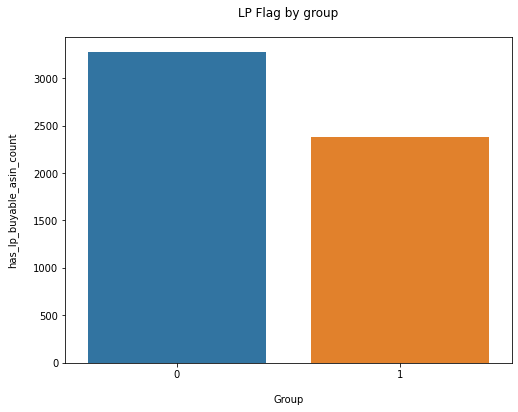

In [50]:
plt.figure(figsize=(8,6))

sns.barplot(x=df_randomized['test_flag'], y=df_randomized['has_lp_buyable_asin_count'], ci=False)

#plt.ylim(0, 1.5)
plt.title('LP Flag by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('has_lp_buyable_asin_count', labelpad=15)

Text(0, 0.5, 'cn_based_buyable_asin_count')

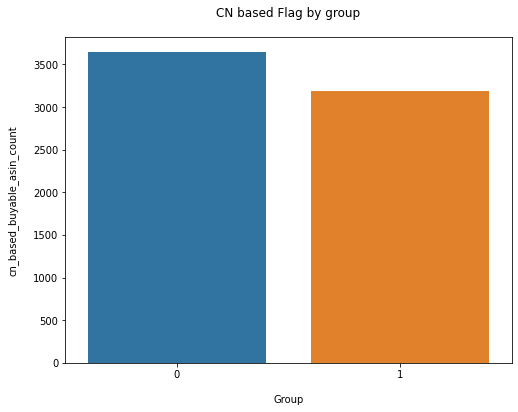

In [51]:
plt.figure(figsize=(8,6))

sns.barplot(x=df_randomized['test_flag'], y=df_randomized['cn_based_buyable_asin_count'], ci=False)

#plt.ylim(0, 1.5)
plt.title('CN based Flag by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('cn_based_buyable_asin_count', labelpad=15)

Text(0, 0.5, 'sas_managed_buyable_asin_count')

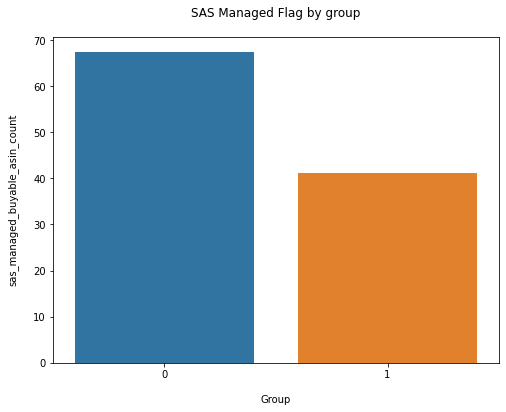

In [52]:
plt.figure(figsize=(8,6))

sns.barplot(x=df_randomized['test_flag'], y=df_randomized['sas_managed_buyable_asin_count'], ci=False)

#plt.ylim(0, 1.5)
plt.title('SAS Managed Flag by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('sas_managed_buyable_asin_count', labelpad=15)

In [54]:
df_randomized.to_csv('sellers_for_experiment_10%.csv')